<a href="https://colab.research.google.com/github/ayyash-ayyub/Artificial-Intelligence-Lab/blob/main/example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOPIK: DATA PREPARATION FOR FORECASTING (A1)**

# Identify multiple source data

1. Identifikasi dataset yang diberikan sebagai berikut:
https://www.kaggle.com/shree1992/housedata

2. jelaskan kategori atau tipe data untuk masing - masing atribut atau variable
3. baca dataset tersebut dengan Python pandas dan berikan dokumentasi sederhana mengenai cara kerja



**AWALI SEMUA AKTIVITAS DENGAN DOA DAN USAHA YANG SUNGGUH SUNGGUH INSYALLAH HASIL TIDAK AKAN MENGECEWAKAN**

Nb : jika belum saya kasih nomor semisal "Jawaban soal nomor 1.(A1)" berati itu masih seputar jawaban dari soal yang sedang dikerjakan jika misal sudah muncul soal dan jawaban berbeda maka itu jawaban dari soal yang sedang dikerjakan.

In [ ]:
# Jawaban soal nomor 1.(A1)
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive/')

# Import Library
import numpy as np # aljabar linear
import pandas as pd # pengolahan data, file CSV I/O (misalnya pd.read_csv)

# File data input tersedia dalam read-only ".. Direktori /input/"
# Misalnya, menjalankan ini (dengan mengklik jalankan atau tekan Shift+Enter) akan mencantumkan semua file di bawah direktori input
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Anda dapat menulis hingga 20GB ke direktori saat ini (/kaggle/working/) yang dipertahankan sebagai output saat Anda membuat versi menggunakan "Save &amp; Run All" 
# Anda juga dapat menulis file sementara ke /kaggle/temp/, tetapi tidak akan disimpan di luar sesi saat ini

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import Library
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Dataset LKS House Data/data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Jawaban soal nomor 2.(A1)
# fungsi dari print(data.info()) adalah untuk mengetahui isi kategori atau tipe data untuk masing - masing atribut atau variable dari dataset https://www.kaggle.com/shree1992/housedata
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Jawaban soal nomor 3.(A1)
# fungsi dari print (data.shape) adalah untuk mengetahui berapa jumlah baris dan kolom dalam dataset https://www.kaggle.com/shree1992/housedata
data.shape

(4600, 18)

In [ ]:
data.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


# **TOPIK: DATA PREPROCESSING FOR FORECASTING (B1)**

1. Berdasarkan data A1 yang sudah anda baca, jelaskan tujuan dari forecasting apa yang ingin dilakukan?

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas forecasting (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll), tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


                        **Jawaban soal nomor 1.(B1)**

**1. TUJUAN DARI PROGRAM FORECASTING HOUSE DATA PREDICT**

Forecasting atau perkiraan adalah kegiatan yang bertujuan untuk meramalkan atau memprediksi segala hal yang terkait dengan produksi, penawaran, permintaan ,dan penggunaan teknologi dalam sebuah industri atau usaha. Perkiraan ini pada akhirnya akan digunakan oleh perusahaan maupun pihak manajemen operasional untuk membuat perencanaan terkait kegiatan usaha dalam beberapa periode tertentu.

 

Untuk menjamin sebuah tingkat perkiraan yang akurat dan bisa digunakan sebagai dasar perhitungan sebuah proses bisnis kedepannya, tentu butuh sebuah alat ukur yang akurat dan teruji berdasarkan jenis perkiraan itu sendiri. 

 

**2. MENANGANI MISSING VALUE**

Dalam menangani data missing value disini saya menggunakan fungsi drop() bisa kalian lihat saya menghapus data "NAN"(missing value) yang ada dalam tabel head (street,city,statezip,country,price)

In [ ]:
# Jawaban soal nomor 2.(B1)
# Dataset masih mengandung beberapa missing value.
X = data.drop(["date",'street', 'city','statezip', 'country','price'], axis=1)
y = data[['price']]

In [ ]:
# Menampilkan isi kolom X
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [ ]:
# Jawaban soal nomor 3.(B1)
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [ ]:
X.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

**3. NORMALISASI DATA**

 Z-score

 
Metode ketiga adalah Z-score atau disebut juga standard score. Dengan formula ini, masing-masing nilai pada fitur dikurangi dengan miu (µ) yang merupakan nilai rata-rata fitur, kemudian dibagi dengan sigma (σ) yang merupakan standar deviasi.

Cara ini akan menghasilkan nilai baru hasil normalisasi yang berkisar di angka 0 dan biasanya ada pada rentang antara -3 dan 3 tetapi bisa juga lebih tinggi atau lebih rendah.

In [ ]:
data["price"] = (data["price"] - data["price"].mean()) / data["price"].std()

Jawaban soal nomor 5 B1

**4. MEMISAHKAN ANTARA VARAIBEL X DAN Y MENGGUNAKAN SKLEARN TRAIN TEST SPLIT**


pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable.

In [ ]:
X = data.drop(["date",'street', 'city','statezip', 'country','price'], axis=1)
y = data[['price']]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3)
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(train_X,train_y)
lrm.score(train_X, train_y)*100

15.757630188801153

In [ ]:
# .corr digunakan  untuk mendapatkan korelasi antara dua kolom
data.corr() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [ ]:
# akan memberikan jumlah kolom-nilai yang hilang.
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# .count() berfungsi untuk menghitung jumlah nilai yang sama dari sebuah variabel atau list
data[data==0].count()

date                0
price               0
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [ ]:
# berfungsi untuk menampilkan jumlah head colom yang ada pada dataset 
data[data["price"]==0].head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [ ]:
df1 = data[(data.bedrooms == 4) & (data.bathrooms > 1) & (data.bathrooms < 4) & (data.sqft_living > 2500) & 
         (data.sqft_living < 3000) & (data.floors < 3) & (data.yr_built < 1970)]

In [ ]:
df1.shape

(79, 18)

In [ ]:
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
data['price'].replace(to_replace = 0, value = 735000, inplace = True)
len(data[data["price"]==0])

0

**HASIL AKHIR DARI DATASET HOUSE PRICE PREDICT YANG SAYA VISUALISASIKAN**

Text(0.5, 1.0, 'House Price Predict (Bedrooms VS Price)')

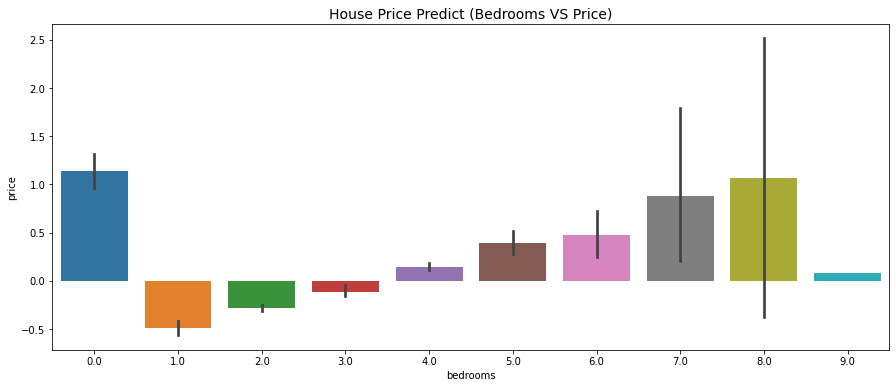

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['price'])
ax.set_title('House Price Predict (Bedrooms VS Price)', fontsize=14)

Text(0.5, 1.0, 'House Price Predict (Bedrooms VS Sqft_living)')

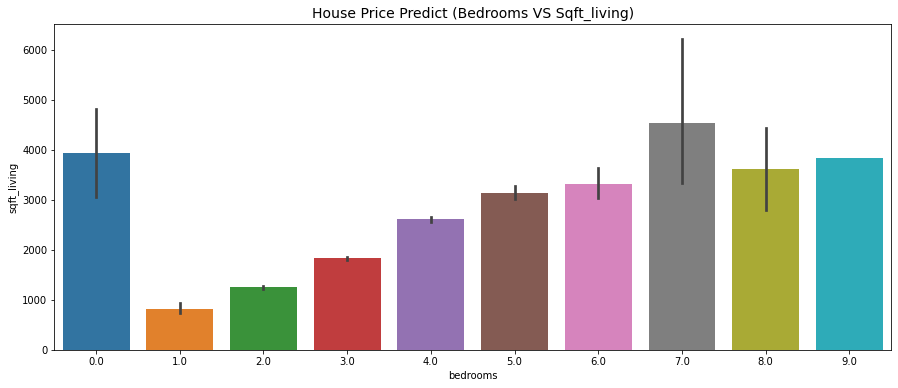

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bedrooms'], y=data['sqft_living'])
ax.set_title('House Price Predict (Bedrooms VS Sqft_living)', fontsize=14)

Text(0.5, 1.0, 'Bathrooms VS Price')

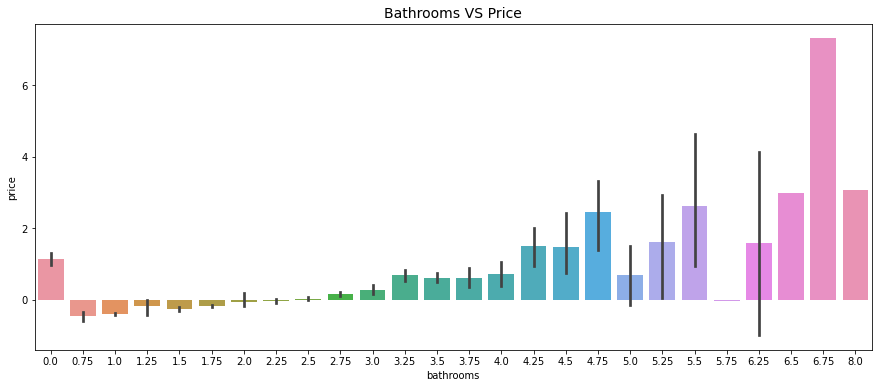

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=data['bathrooms'], y=data['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('House Price Predict (Bathrooms VS Price)', fontsize=14)

# **TOPIK: DATA PREPROCESSING FOR CLUSTERING (B2)**


1. Diberikan suatu dataset https://www.kaggle.com/uciml/iris
apakah data tersebut bisa menjadi kasus clustering (pengelompokan berdasarkan kemiripan data?) jelaskan menurut bahasa anda dan variable apa yang dihilangkan agar kasus-nya menjadi clustering. baca dataset dengan Python

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas clustering (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll) atau tugas lainnya.. tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


Jawaban nomor 1 (B2)


Clustering adalah metode penganalisaan data, yang sering dimasukkan sebagai salah satu metode Data Mining, yang tujuannya adalah untuk mengelompokkan data dengan karakteristik yang sama ke suatu ‘wilayah’ yang sama dan data dengan karakteristik yang berbeda ke ‘wilayah’ yang lain.

Ada beberapa pendekatan yang digunakan dalam mengembangkan metode clustering. Dua pendekatan utama adalah clustering dengan pendekatan partisi dan clustering dengan pendekatan hirarki. Clustering dengan pendekatan partisi atau sering disebut dengan partition-based clustering mengelompokkan data dengan memilah-milah data yang dianalisa ke dalam cluster-cluster yang ada. Clustering dengan pendekatan hirarki atau sering disebut dengan hierarchical clustering mengelompokkan data dengan membuat suatu hirarki berupa dendogram dimana data yang mirip akan ditempatkan pada hirarki yang berdekatan dan yang tidak pada hirarki yang berjauhan. Di samping kedua pendekatan tersebut, ada juga clustering dengan pendekatan automatic mapping (Self-Organising Map/SOM)

In [ ]:
# STEP1: CONNECT COLAB TO DRIVE
from google.colab import drive
drive.mount('/content/drive/')

# Import Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Loading Data 
df = pd.read_csv("/content/drive/My Drive/Dataset LKS Iris/Iris.csv")
df.head()

# Jawaban soal nomor 2.(B2)
# Dataset masih mengandung beberapa missing value.
X = df.drop(["SepalLengthCm",'SepalWidthCm', 'PetalLengthCm','PetalWidthCm','Species'], axis=1)
y = df[['Species']]

df = pd.read_csv("/content/drive/My Drive/Dataset LKS Iris/Iris.csv")
X = df.iloc[:, [0, 1, 2, 3]].values

# .info() berfungsi untuk mengetahui apa saja isi yang ada dalam suatu dataset
df.info()
df[0:10]

#Frequency distribution of species"
iris_outcome = pd.crosstab(index=df["Species"],  # Make a crosstab
columns="count")      # Name the count column
iris_outcome

iris_setosa=df.loc[df["Species"]=="Iris-setosa"]
iris_virginica=df.loc[df["Species"]=="Iris-virginica"]
iris_versicolor=df.loc[df["Species"]=="Iris-versicolor"]

df = df.iloc[:, 0:6]
df.head()



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **TOPIK: DATA PREPROCESSING FOR CLASSIFICATION (B3)**

1. Diberikan suatu dataset https://www.kaggle.com/ronitf/heart-disease-uci
apakah data tersebut bisa menjadi kasus classification (pengelompokan berdasarkan class data?) jelaskan menurut bahasa anda dan variable apa yang dihilangkan agar kasus-nya menjadi clustering. baca dataset dengan Python

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas classification (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll) atau tugas lainnya.. tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


In [ ]:
#MASUKAN JAWABAN B3 disini (jika jawaban merupakan isian, gunakan comment Python #
#jawaban soal nomor 1 (b3)
# CONNECT GOOGLE DRIVE
from google.colab import drive
# Import Library and Load File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing as per
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/My Drive/Dataset LKS Heart/heart.csv")

Mounted at /content/drive/


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df[10:15]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [ ]:
df.iloc[:,0:13]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Jawaban soal nomor 2 (B3)
# Missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
df.isna().any(axis = None)

False

Text(0.5, 1.0, 'Age distribution.')

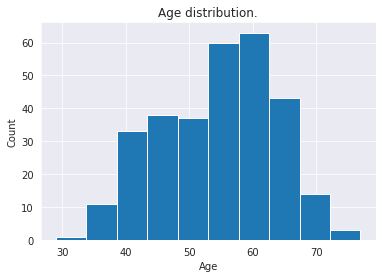

In [ ]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']
sns.set_style('darkgrid')

plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

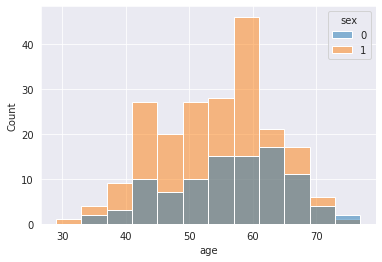

In [ ]:
sns.histplot(data=df, x="age", hue="sex")

In [ ]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [ ]:
#Jawaban soal nomor 3 (B3)
# Tugas classification
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


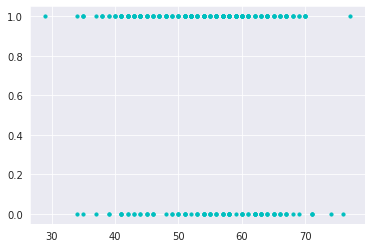

In [ ]:
plt.scatter(df.age, df.sex, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [ ]:
#Jawaban soal nomor 4 (B3)
# Normalisasi pada dataset
import numpy as np
from sklearn import preprocessing

print("Rows             :", df.shape[0])
print("\nColumn         :", df.shape[1])
print("\nFeatures       :", df.columns.tolist())
print("\nMissing Values :", df.isnull().sum().sum())
print("Data types       :", df.info())

Rows             : 303

Column         : 14

Features       : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing Values : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Data types    

In [ ]:
#store the target in 'y'

y = df["target"]
#store the features in 'X'

X = df.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


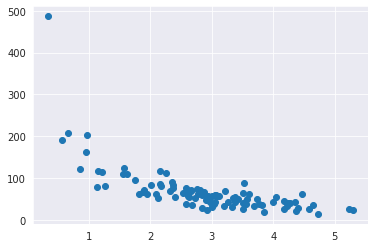

In [ ]:
#Jawaban soal nomor 5 (B3)
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

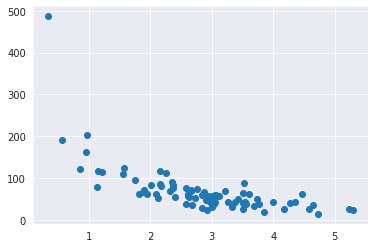

In [ ]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]
plt.scatter(train_x, train_y)
plt.show()

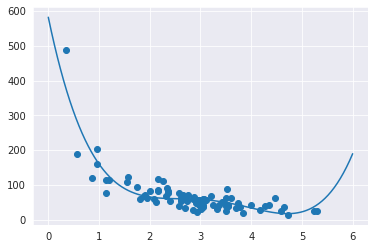

In [ ]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629798


In [ ]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343566


In [ ]:
print(mymodel(5))

22.87962591811663


# **TOPIK: DATA DEPENDENCY VISUALIZATION (C1)**

1. pada dataset A1 dan B1, identifikasi korelasi antara feature (independent variable) dan dependent variable dengan matrix korelasi, tuliskan dalam Python
2. pada no.1, bagian mana yang memiiki korelasi yang kuat, jelaskan alasan nya
3. gambarkan visualisasi dari feature
4. gambarkan visualisasi dari class label
5. gambarkan visualisasi dari atribut
6. gambarkan visualisasi dari aliran data

In [ ]:
#MASUKAN JAWABAN C1 disini (jika jawaban merupakan isian, gunakan comment Python #

# **TOPIK: DATA FORECASTING (D1)**

1. Berdasarkan data A1, tentukan feature yang akan digunakan
2. Buatlah rencana plan forecasting
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk forecasting?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk forecasting
7. pilih algoritma forecasting yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa performa dari forecasting
11. analisa akurasi dari forecasting
12. analisa f-measure dengan sklearn

In [ ]:
#MASUKAN JAWABAN D1 disini (jika jawaban merupakan isian, gunakan comment Python #

# **TOPIK: DATA CLUSTERING (E1)**

1. Berdasarkan data B2, tentukan feature yang akan digunakan
2. Buatlah rencana plan clustering
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk clustering?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk clustering
7. pilih algoritma clustering yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa homogenity dari clustering
11. analisa heterogenity dari clustering
12. analisa kualitas clustering dengan sklearn

In [ ]:
#MASUKAN JAWABAN E1 disini (jika jawaban merupakan isian, gunakan comment Python #

# **TOPIK: DATA CLASSIFICATION (F1)**

1. Berdasarkan data B3, tentukan feature yang akan digunakan
2. Buatlah rencana plan Classification
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk Classification?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk Classification
7. pilih algoritma Classification yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa performa dari Classification
11. analisa akurasi dari Classification
12. analisa f-measure dengan sklearn

In [ ]:
#MASUKAN JAWABAN F1 disini (jika jawaban merupakan isian, gunakan comment Python #